In [ ]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
%pip install gridsim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt


In [19]:
%matplotlib inline

In [3]:
pd.read_csv('D:\LKTI\Folder Baru\Data Denmark.csv', sep = ';')

,No,Parameter,Nilai Satuan,Keterangan
0,1,Electricity demand,"32,76143808 TWh",Permintaan listrik total per tahun di Denmark
1,2,Total capacity thermal,"7915,658 MW",Kapasitas terpasang pembangkit listrik thermal
2,3,Total thermal generation,"13,19751584 TWh",Total produksi listrik dari pembangkit thermal
3,4,Condensing capacity,"2068,77884 MW",Kapasitas pembangkit condensing (hanya menghas...
4,5,CHP capacity,"5846,87916MW",Kapasitas pembangkit Combined Heat and Power (...
5,6,Minimum load condensing,"827,5115359 MW",Beban minimum operasi unit condensing
6,7,Minimum load CHP,"2338,751664 MW",Beban minimum operasi dari unit CHP
7,8,Nuclear capacity,0 MW,Denmark tidak memiliki PLTN
8,9,Minimum partload condensing,40%,Tidak berlaku karena tidak ada PLTN
9,10,Condensing electricity generation,"5,149007034 TWh",Produksi listrik tahunan dari pembangkit conde...


In [12]:
import pandas as pd

df = pd.read_csv('D:\LKTI\Folder Baru\Data Denmark.csv', sep = ';')
print(df.columns)
df.head()

Index(['No', 'Parameter', 'Nilai Satuan', 'Keterangan'], dtype='object')


,No,Parameter,Nilai Satuan,Keterangan
0,1,Electricity demand,"32,76143808 TWh",Permintaan listrik total per tahun di Denmark
1,2,Total capacity thermal,"7915,658 MW",Kapasitas terpasang pembangkit listrik thermal
2,3,Total thermal generation,"13,19751584 TWh",Total produksi listrik dari pembangkit thermal
3,4,Condensing capacity,"2068,77884 MW",Kapasitas pembangkit condensing (hanya menghas...
4,5,CHP capacity,"5846,87916MW",Kapasitas pembangkit Combined Heat and Power (...


In [6]:
print(df.columns)
df.head()

Index(['No', 'Parameter', 'Nilai Satuan', 'Keterangan'], dtype='object')


,No,Parameter,Nilai Satuan,Keterangan
0,1,Electricity demand,"32,76143808 TWh",Permintaan listrik total per tahun di Denmark
1,2,Total capacity thermal,"7915,658 MW",Kapasitas terpasang pembangkit listrik thermal
2,3,Total thermal generation,"13,19751584 TWh",Total produksi listrik dari pembangkit thermal
3,4,Condensing capacity,"2068,77884 MW",Kapasitas pembangkit condensing (hanya menghas...
4,5,CHP capacity,"5846,87916MW",Kapasitas pembangkit Combined Heat and Power (...


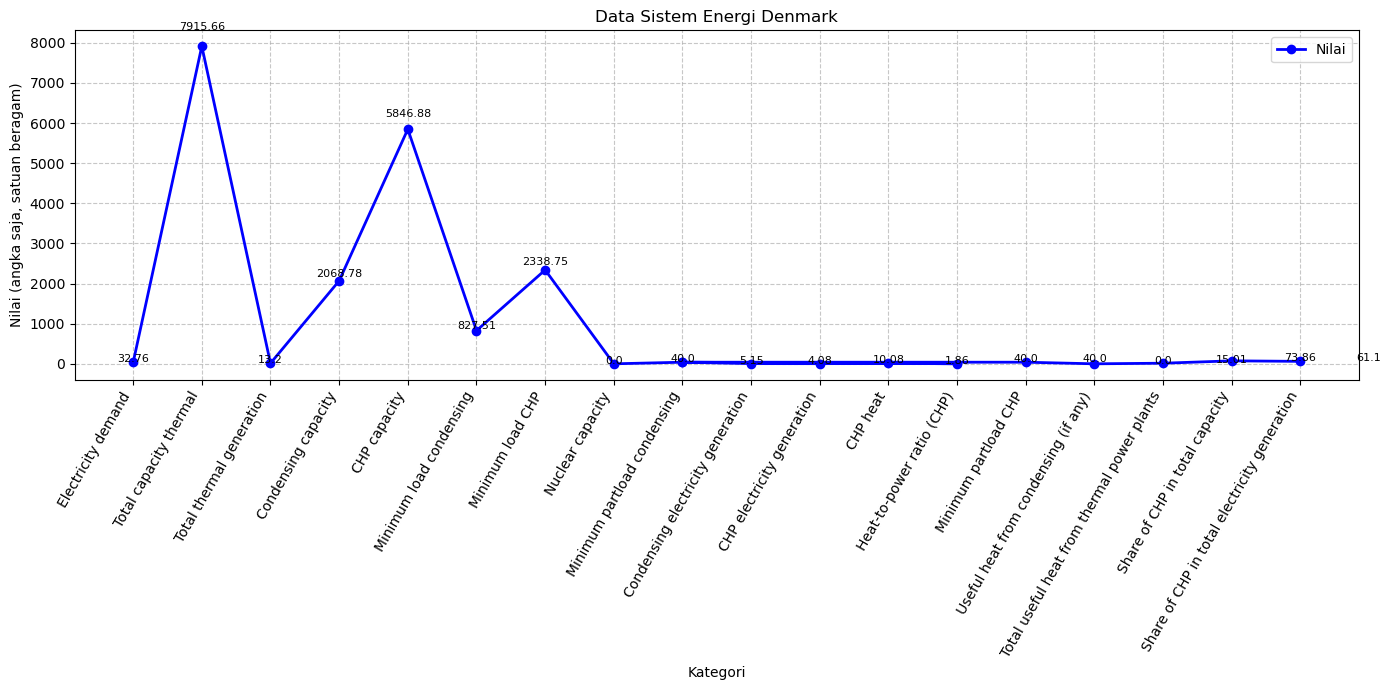

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Baca CSV
df = pd.read_csv('D:\LKTI\Folder Baru\Data Denmark.csv', sep=';') # Corrected filename

# Fungsi ekstraksi angka
def extract_number(x):
    x = str(x).replace('.', '').replace(',', '.')  # normalisasi
    num_match = re.search(r'[\d]+(\.\d+)?', x)
    if not num_match:
        return None
    return float(num_match.group())

# Tambahkan kolom angka
df['Nilai_cleaned'] = df['Nilai Satuan'].apply(extract_number)

# Buang NaN
df_cleaned = df.dropna(subset=['Nilai_cleaned'])

# Plot grafik garis
plt.figure(figsize=(14,7))
plt.plot(df_cleaned['Parameter'], df_cleaned['Nilai_cleaned'],
         marker='o', color='blue', linewidth=2, label="Nilai")

# Tambahkan label angka
for i, val in enumerate(df_cleaned['Nilai_cleaned']):
    plt.text(i, val + (0.05*val if val != 0 else 0.1),
             f"{round(val,2)}", ha='center', fontsize=8)

# Judul & label
plt.title('Data Sistem Energi Denmark')
plt.xlabel('Kategori')
plt.ylabel('Nilai (angka saja, satuan beragam)')
plt.xticks(rotation=60, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [8]:
pd.read_csv('D:\Tugas Energi\Data Inggris .csv')

,No;Parameter;Nilai ;Keterangan
1;Electricity demand;310,6171841TWh;Permintaan listrik total per tahun ...
2;Total thermal capacity;64167,8 MW;Kapasitas terpasang pembangkit listrik th...
3;Total thermal generation;125,5381425 TWh;Total produksi listrik dari pemban...
4;Condensing capacity;58232,3 MW;Kapasitas pembangkit condensing (hanya me...
5;CHP capacity;5935,5 MW;Kapasitas pembangkit Combined Heat and Po...
6;Minimum load condensing;23292,92 MW;Beban minimum operasi dari unit condensing
7;Minimum load CHP;2374,2 MW;Beban minimum operasi dari unit CHP
8;Nuclear capacity;8954,2 MW;Inggris memiliki kapasitas PLTN aktif
9;Minimum partload for nuclear;50%;Beban operasi minimum untuk reaktor nuklir,NaN
10;Condensing electricity generation;121,3699466 TWh;Produksi listrik tahunan dari unit...


In [9]:
import pandas as pd

df = pd.read_csv('D:\Tugas Energi\Data Inggris .csv')
print(df.columns)
df.head()

Index(['No;Parameter;Nilai ;Keterangan'], dtype='object')


,No;Parameter;Nilai ;Keterangan
1;Electricity demand;310,6171841TWh;Permintaan listrik total per tahun ...
2;Total thermal capacity;64167,8 MW;Kapasitas terpasang pembangkit listrik th...
3;Total thermal generation;125,5381425 TWh;Total produksi listrik dari pemban...
4;Condensing capacity;58232,3 MW;Kapasitas pembangkit condensing (hanya me...
5;CHP capacity;5935,5 MW;Kapasitas pembangkit Combined Heat and Po...


In [10]:
print(df.columns)
df.head()

Index(['No;Parameter;Nilai ;Keterangan'], dtype='object')


,No;Parameter;Nilai ;Keterangan
1;Electricity demand;310,6171841TWh;Permintaan listrik total per tahun ...
2;Total thermal capacity;64167,8 MW;Kapasitas terpasang pembangkit listrik th...
3;Total thermal generation;125,5381425 TWh;Total produksi listrik dari pemban...
4;Condensing capacity;58232,3 MW;Kapasitas pembangkit condensing (hanya me...
5;CHP capacity;5935,5 MW;Kapasitas pembangkit Combined Heat and Po...


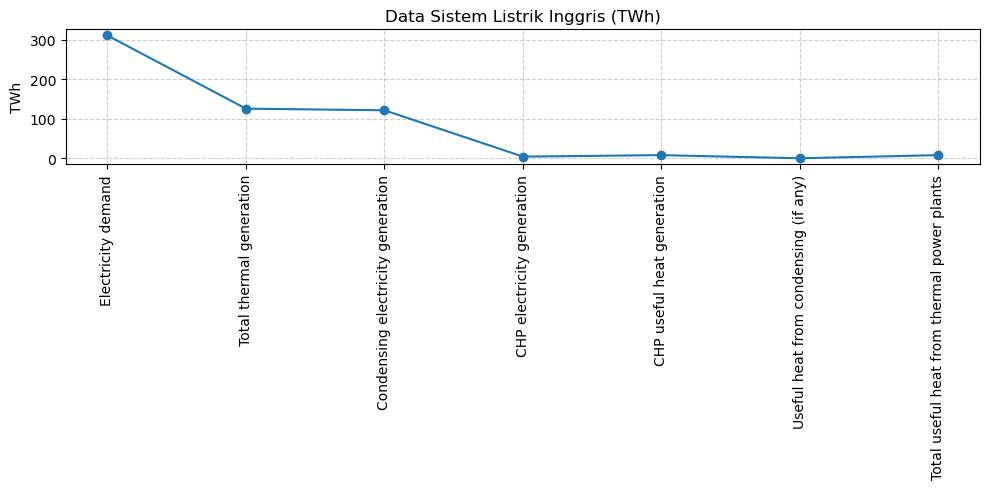

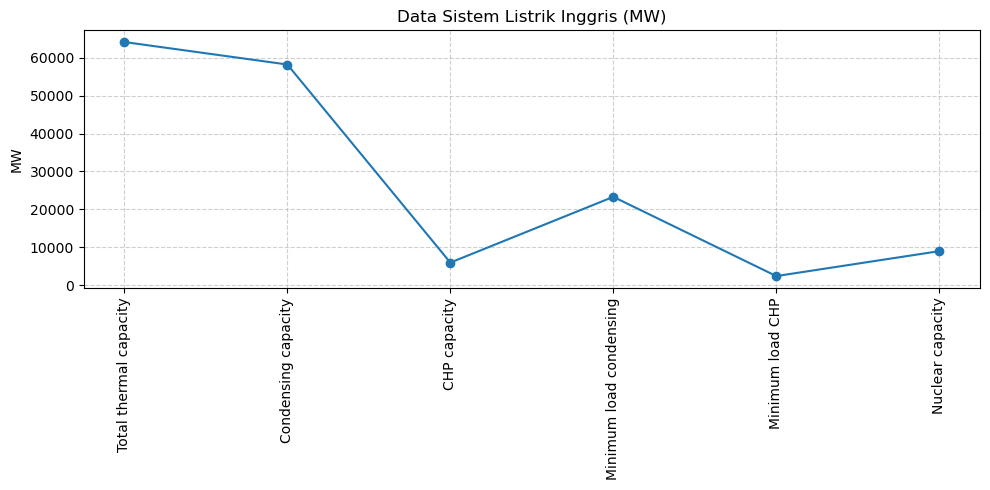

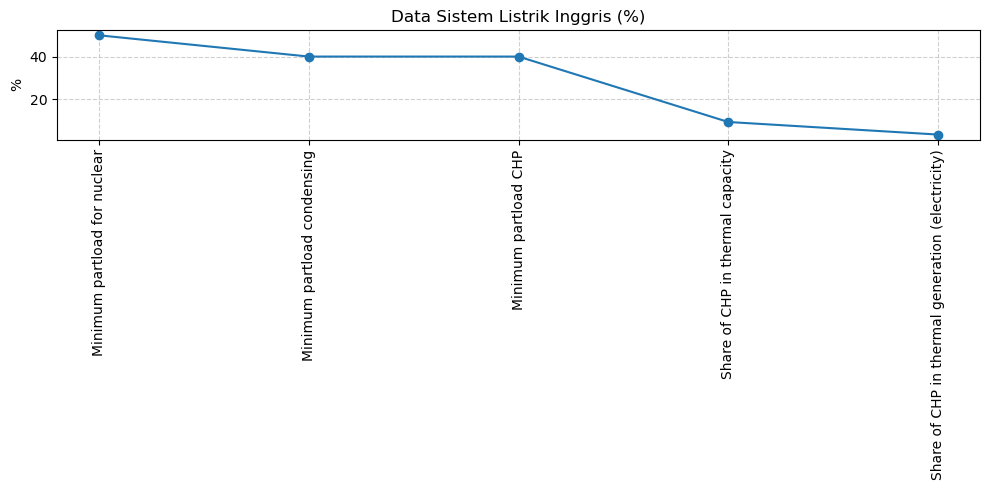

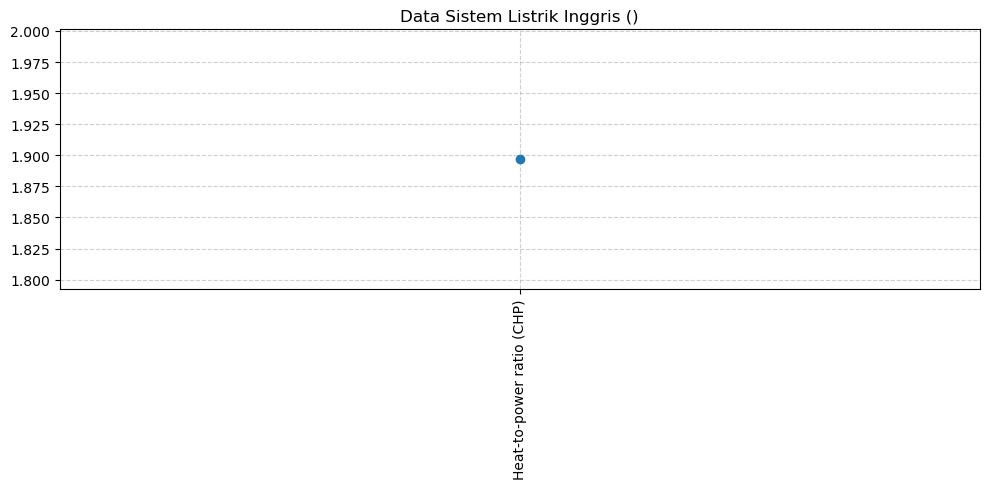

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import io # Import io module

# Baca file CSV - read as a single column first
with open('D:\Tugas Energi\Data Inggris .csv', 'r') as f:
    csv_string = f.read()

# Manually split the string into lines and then split each line by semicolon
data = [line.split(';') for line in csv_string.strip().split('\n')]

# Create DataFrame from the split data
df = pd.DataFrame(data[1:], columns=[col.strip() for col in data[0]]) # Use first row as header and strip whitespace


# Strip whitespace from column names again after manual splitting
df.columns = df.columns.str.strip()

# Function to extract number and unit
def split_value(val):
    if pd.isna(val):
        return None, None
    match = re.match(r'([\d\.,]+)\s*([A-Za-z%]*)', str(val))
    if match:
        number = match.group(1).replace('.', '').replace(',', '.')
        try:
            number = float(number)
        except:
            number = None
        unit = match.group(2)
        return number, unit
    return None, None

# Tambahkan kolom angka & satuan - Use the correct column name 'Nilai' after stripping
# Make sure 'Nilai' column exists before applying the function
if 'Nilai' in df.columns:
    df[['Angka','Satuan']] = df['Nilai'].apply(lambda x: pd.Series(split_value(x)))
else:
    print("Error: 'Nilai' column not found after processing.")
    # Optionally, you might want to inspect df.columns here again

# --- Buat grafik untuk tiap satuan ---
# Only proceed if 'Angka' and 'Satuan' columns were created successfully
if 'Angka' in df.columns and 'Satuan' in df.columns:
    satuan_list = df['Satuan'].dropna().unique()

    for satuan in satuan_list:
        subset = df[df['Satuan'] == satuan]
        plt.figure(figsize=(10,5))
        plt.plot(subset['Parameter'], subset['Angka'], marker='o', linestyle='-')
        plt.title(f'Data Sistem Listrik Inggris ({satuan})')
        plt.xticks(rotation=90)
        plt.ylabel(satuan)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
else:
    print("Could not generate plots due to missing 'Angka' or 'Satuan' columns.")

In [14]:
pd.read_csv('D:\LKTI\Folder Baru\Data_Sistem_Norwegia.csv', sep = ';')

,No,Parameter,Nilai + Satuan,Keterangan
0,1,Demand listrik,"132,98 TWh",Permintaan tahunan
1,2,Kapasitas termal,"1.600,00 MW",Kapasitas sistem CHP
2,3,Generasi termal,"3,37 TWh",Total energi CHP
3,4,Kapasitas condensing,0 MW,Tidak ada pembangkit
4,5,Kapasitas CHP,~1.600 MW,CHP terpasang
5,6,Listrik CHP,"1,71 TWh",Produksi listrik
6,7,Panas CHP,"1,66 TWh",Produksi panas
7,8,Rasio panas/listrik,"0,97",Rasio efisiensi
8,9,Share CHP,"1,29 %",Proporsi CHP nasional
9,10,Share condensing,0 %,Tidak ada


In [15]:
import pandas as pd
df = pd.read_csv('D:\LKTI\Folder Baru\Data_Sistem_Norwegia.csv')
print(df.columns)
df.head()

Index(['No;Parameter;Nilai + Satuan;Keterangan'], dtype='object')


,No;Parameter;Nilai + Satuan;Keterangan
1;Demand listrik;132,98 TWh;Permintaan tahunan
2;Kapasitas termal;1.600,00 MW;Kapasitas sistem CHP
3;Generasi termal;3,37 TWh;Total energi CHP
4;Kapasitas condensing;0 MW;Tidak ada pembangkit,NaN
5;Kapasitas CHP;~1.600 MW;CHP terpasang,NaN


In [16]:
print(df.columns)
df.head()

Index(['No;Parameter;Nilai + Satuan;Keterangan'], dtype='object')


,No;Parameter;Nilai + Satuan;Keterangan
1;Demand listrik;132,98 TWh;Permintaan tahunan
2;Kapasitas termal;1.600,00 MW;Kapasitas sistem CHP
3;Generasi termal;3,37 TWh;Total energi CHP
4;Kapasitas condensing;0 MW;Tidak ada pembangkit,NaN
5;Kapasitas CHP;~1.600 MW;CHP terpasang,NaN


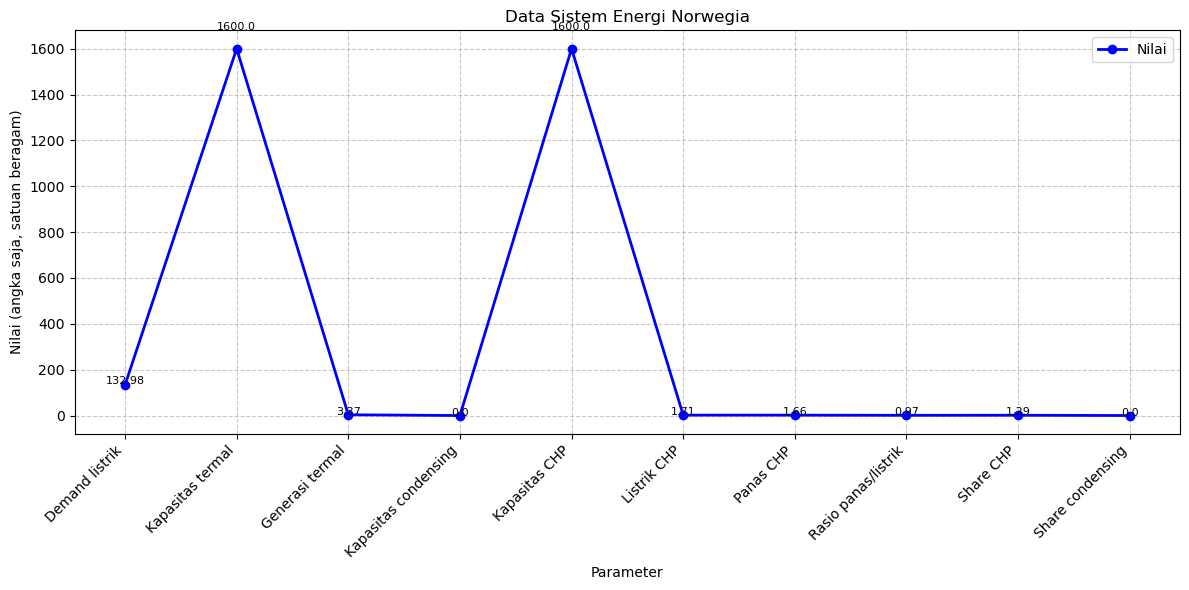

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Baca CSV
df = pd.read_csv('D:/LKTI/Folder Baru/Data_Sistem_Norwegia.csv', sep=';')

# Fungsi ekstraksi angka dari string
def extract_number(x):
    x = str(x).replace('.', '').replace(',', '.')  # normalisasi koma & titik
    num_match = re.search(r'[\d]+(\.\d+)?', x)
    if not num_match:
        return None
    return float(num_match.group())

# Tambahkan kolom angka
df['Nilai_cleaned'] = df['Nilai + Satuan'].apply(extract_number)

# Buang NaN supaya bisa diplot
df_cleaned = df.dropna(subset=['Nilai_cleaned'])

# Plot grafik garis
plt.figure(figsize=(12,6))
plt.plot(df_cleaned['Parameter'], df_cleaned['Nilai_cleaned'],
         marker='o', color='blue', linewidth=2, label="Nilai")

# Tambahkan angka di tiap titik
for i, val in enumerate(df_cleaned['Nilai_cleaned']):
    plt.text(i, val + (0.05*val if val != 0 else 0.1),
             f"{val}", ha='center', fontsize=8)

# Judul & label
plt.title('Data Sistem Energi Norwegia')
plt.xlabel('Parameter')
plt.ylabel('Nilai (angka saja, satuan beragam)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [17]:
pd.read_csv('D:\LKTI\Folder Baru\Permintaan_dan_Produksi_Nasional.csv', sep=';')

,No,Parameter,Nilai + Satuan,Keterangan
0,1,Total permintaan listrik,"305,12 TWh",Data tahun 2023 dari RUPTL PLN
1,2,Kapasitas pembangkit terpasang,± 81.000 MW,Termasuk semua jenis pembangkit
2,3,Kapasitas pembangkit termal,± 51.000 MW,Mayoritas PLTU batubara dan PLTG
3,4,Kontribusi termal ke listrik,"± 210,00 TWh",Sekitar 68–70% dari bauran pembangkitan
4,5,Kontribusi EBT (renewables),± 14–15 %,"PLTA, PLTS, PLTB, biomassa, panas bumi"
5,6,Target EBT 2025,23 %,Dalam dokumen RUEN dan Kebijakan Energi Nasional


In [18]:
import pandas as pd

df = pd.read_csv('D:\LKTI\Folder Baru\Permintaan_dan_Produksi_Nasional.csv', sep=";")
print(df.columns)
df.head()

Index(['No', 'Parameter', 'Nilai + Satuan', 'Keterangan'], dtype='object')


,No,Parameter,Nilai + Satuan,Keterangan
0,1,Total permintaan listrik,"305,12 TWh",Data tahun 2023 dari RUPTL PLN
1,2,Kapasitas pembangkit terpasang,± 81.000 MW,Termasuk semua jenis pembangkit
2,3,Kapasitas pembangkit termal,± 51.000 MW,Mayoritas PLTU batubara dan PLTG
3,4,Kontribusi termal ke listrik,"± 210,00 TWh",Sekitar 68–70% dari bauran pembangkitan
4,5,Kontribusi EBT (renewables),± 14–15 %,"PLTA, PLTS, PLTB, biomassa, panas bumi"


In [19]:
print(df.columns)
df.head()

Index(['No', 'Parameter', 'Nilai + Satuan', 'Keterangan'], dtype='object')


,No,Parameter,Nilai + Satuan,Keterangan
0,1,Total permintaan listrik,"305,12 TWh",Data tahun 2023 dari RUPTL PLN
1,2,Kapasitas pembangkit terpasang,± 81.000 MW,Termasuk semua jenis pembangkit
2,3,Kapasitas pembangkit termal,± 51.000 MW,Mayoritas PLTU batubara dan PLTG
3,4,Kontribusi termal ke listrik,"± 210,00 TWh",Sekitar 68–70% dari bauran pembangkitan
4,5,Kontribusi EBT (renewables),± 14–15 %,"PLTA, PLTS, PLTB, biomassa, panas bumi"


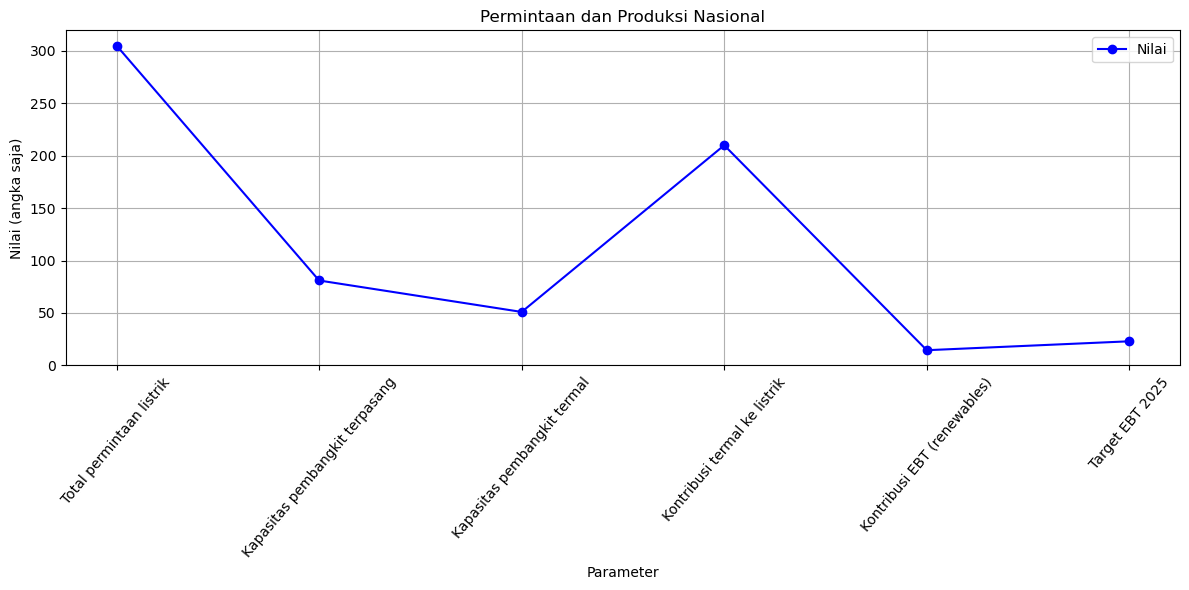

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Bersihkan kolom 'Nilai + Satuan'
df['Nilai_cleaned'] = (
    df['Nilai + Satuan']
    .astype(str)
    .str.replace(r'[^\d,.–]', '', regex=True)   # buang semua huruf & simbol selain angka, koma, titik, minus, en-dash
    .str.replace(',', '.', regex=False)         # ganti koma dengan titik desimal
    .str.replace('–', '-', regex=False)         # ganti en-dash dengan minus
)

# Ambil angka rata-rata jika berupa rentang (contoh: '14-15')
def parse_value(x):
    if '-' in x:
        parts = x.split('-')
        try:
            return (float(parts[0]) + float(parts[1])) / 2
        except:
            return None
    try:
        return float(x)
    except:
        return None

df['Nilai_cleaned'] = df['Nilai_cleaned'].apply(parse_value)

# Drop NaN supaya bisa diplot
df_cleaned = df.dropna(subset=['Nilai_cleaned']).copy()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Parameter'], df_cleaned['Nilai_cleaned'], marker='o', color='blue', label='Nilai')

# Judul dan Label
plt.title('Permintaan dan Produksi Nasional')
plt.xlabel('Parameter')
plt.ylabel('Nilai (angka saja)')
plt.xticks(rotation=50)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [21]:
pd.read_csv('D:\LKTI\Folder Baru\Potensi_Energi_Laut baru.csv')

,,,No;Jenis Energi Laut;Potensi;Wilayah Potensia;Status Pemanfaatan
1;Offshore wind;>30 MW;Laut Jawa,Selatan Jawa,Maluku,NTT;Masih tahap studi & pilot
2;Gelombang laut;>17 MW;Pantai selatan Jawa,Sumatera,NTT;Belum dikembangkan,NaN
3;Arus laut;±5600 MW;Selat Larantuka,Selat Sunda;Uji coba skala kecil (BRIN),NaN,NaN
4;Pasang surut;≈4000 MW;Kalimantan Timur,Maluku,Papua;Potensi besar,belum dikaji luas
5;Proyek eksisting;1 unit (pilot);Larantuka (OCEES-BPPT);Non-komersial,hasil riset,NaN,NaN


In [22]:
import pandas as pd

df = pd.read_csv("D:\LKTI\Folder Baru\Potensi_Energi_Laut baru.csv", sep=';')
print(df.columns)
df.head()

Index(['No', 'Jenis Energi Laut', 'Potensi', 'Wilayah Potensia',
       'Status Pemanfaatan'],
      dtype='object')


,No,Jenis Energi Laut,Potensi,Wilayah Potensia,Status Pemanfaatan
0,1,Offshore wind,>30 MW,"Laut Jawa, Selatan Jawa, Maluku, NTT",Masih tahap studi & pilot
1,2,Gelombang laut,>17 MW,"Pantai selatan Jawa, Sumatera, NTT",Belum dikembangkan
2,3,Arus laut,±5600 MW,"Selat Larantuka, Selat Sunda",Uji coba skala kecil (BRIN)
3,4,Pasang surut,≈4000 MW,"Kalimantan Timur, Maluku, Papua","Potensi besar, belum dikaji luas"
4,5,Proyek eksisting,1 unit (pilot),Larantuka (OCEES-BPPT),"Non-komersial, hasil riset"


In [23]:
print(df.columns)
df.head()

Index(['No', 'Jenis Energi Laut', 'Potensi', 'Wilayah Potensia',
       'Status Pemanfaatan'],
      dtype='object')


,No,Jenis Energi Laut,Potensi,Wilayah Potensia,Status Pemanfaatan
0,1,Offshore wind,>30 MW,"Laut Jawa, Selatan Jawa, Maluku, NTT",Masih tahap studi & pilot
1,2,Gelombang laut,>17 MW,"Pantai selatan Jawa, Sumatera, NTT",Belum dikembangkan
2,3,Arus laut,±5600 MW,"Selat Larantuka, Selat Sunda",Uji coba skala kecil (BRIN)
3,4,Pasang surut,≈4000 MW,"Kalimantan Timur, Maluku, Papua","Potensi besar, belum dikaji luas"
4,5,Proyek eksisting,1 unit (pilot),Larantuka (OCEES-BPPT),"Non-komersial, hasil riset"


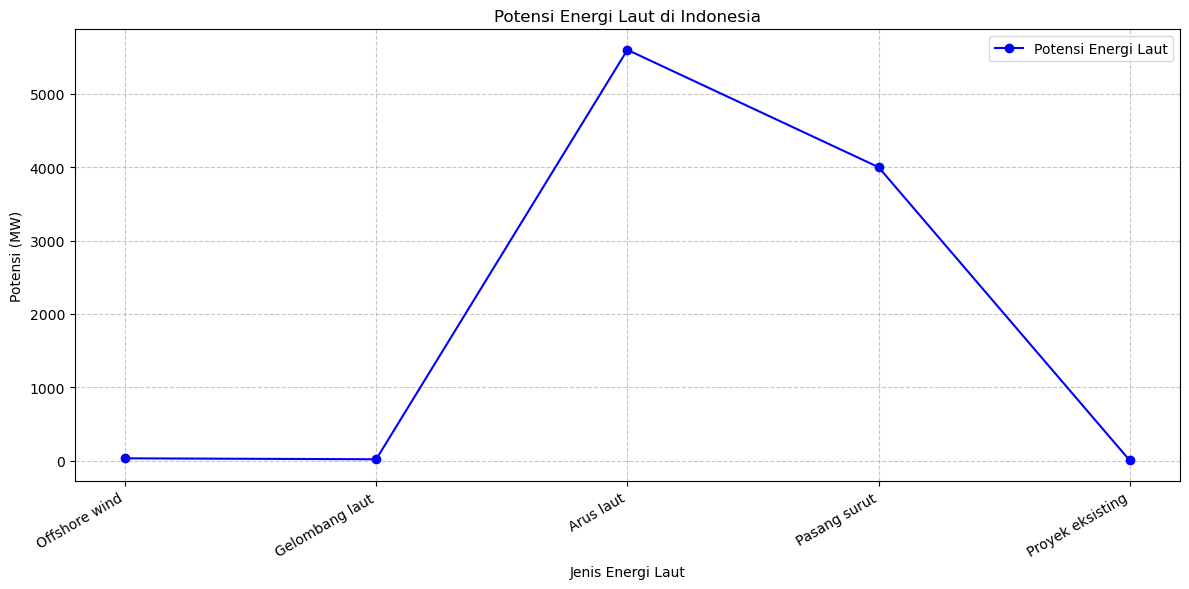

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Baca CSV
df = pd.read_csv("D:\LKTI\Folder Baru\Potensi_Energi_Laut baru.csv", sep=';')

# Bersihkan kolom 'Potensi'
df['Potensi_cleaned'] = (
    df['Potensi']
    .astype(str)
    .str.replace(r'[^\d,.–-]', '', regex=True)  # buang simbol selain angka
    .str.replace(',', '.', regex=False)         # ganti koma jadi titik
    .str.replace('–', '-', regex=False)         # ganti en-dash jadi minus
)

# Parsing nilai (ambil rata-rata kalau rentang)
def parse_value(x):
    if '-' in x:
        parts = x.split('-')
        try:
            return (float(parts[0]) + float(parts[1])) / 2
        except:
            return None
    try:
        return float(x)
    except:
        return None

df['Potensi_cleaned'] = df['Potensi_cleaned'].apply(parse_value)

# Drop NaN supaya bisa diplot
df_cleaned = df.dropna(subset=['Potensi_cleaned']).copy()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Jenis Energi Laut'], df_cleaned['Potensi_cleaned'],
         marker='o', color='blue', label='Potensi Energi Laut')

# Judul dan label
plt.title('Potensi Energi Laut di Indonesia')
plt.xlabel('Jenis Energi Laut')
plt.ylabel('Potensi (MW)')
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [25]:
pd.read_csv('D:\LKTI\Folder Baru\Sistem_Pembangkit_Termal.csv', sep=';')

,No,Parameter,Nilai,Keterangan
0,1,Kapasitas PLTU (condensing),±48.000 MW,Terbesar di Indonesia
1,2,Kapasitas PLTG,≈3.000 MW,Digunakan untuk beban puncak
2,3,Kapasitas CHP (jika ada),<1.000 MW,Belum dikembangkan secara nasional
3,4,Produksi listrik CHP (perkiraan),"<1,0 TWh",Umumnya di industri besar seperti semen
4,5,Produksi panas dari CHP,"<1,0 TWh",Tidak tercatat dalam sistem nasional
5,6,Emisi karbon sektor listrik,≥600 Juta ton CO2,PLTU menyumbang 35% total emisi nasional
6,7,Rencana pensiun dini PLTU,"9,2 GW",Direncanakan sebelum 2040 (Net Zero 2060)


In [26]:
import pandas as pd

df = pd.read_csv("D:\LKTI\Folder Baru\Sistem_Pembangkit_Termal.csv", sep=';')
print(df.columns)
df.head()

Index(['No', 'Parameter', 'Nilai', 'Keterangan'], dtype='object')


,No,Parameter,Nilai,Keterangan
0,1,Kapasitas PLTU (condensing),±48.000 MW,Terbesar di Indonesia
1,2,Kapasitas PLTG,≈3.000 MW,Digunakan untuk beban puncak
2,3,Kapasitas CHP (jika ada),<1.000 MW,Belum dikembangkan secara nasional
3,4,Produksi listrik CHP (perkiraan),"<1,0 TWh",Umumnya di industri besar seperti semen
4,5,Produksi panas dari CHP,"<1,0 TWh",Tidak tercatat dalam sistem nasional


In [27]:
print(df.columns)
df.head()

Index(['No', 'Parameter', 'Nilai', 'Keterangan'], dtype='object')


,No,Parameter,Nilai,Keterangan
0,1,Kapasitas PLTU (condensing),±48.000 MW,Terbesar di Indonesia
1,2,Kapasitas PLTG,≈3.000 MW,Digunakan untuk beban puncak
2,3,Kapasitas CHP (jika ada),<1.000 MW,Belum dikembangkan secara nasional
3,4,Produksi listrik CHP (perkiraan),"<1,0 TWh",Umumnya di industri besar seperti semen
4,5,Produksi panas dari CHP,"<1,0 TWh",Tidak tercatat dalam sistem nasional


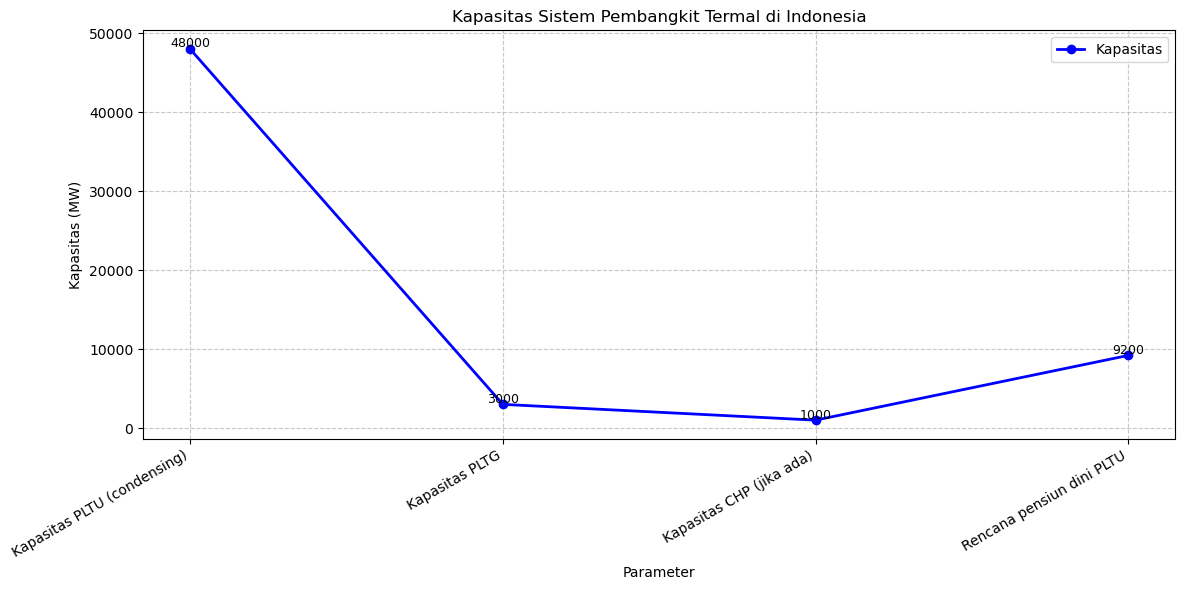

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Baca CSV
df = pd.read_csv('D:\LKTI\Folder Baru\Sistem_Pembangkit_Termal.csv', sep=';')

# Fungsi ekstraksi angka + konversi satuan ke MW
def convert_to_mw(x):
    x = str(x).replace('.', '').replace(',', '.')

    # Cari angka pertama
    num_match = re.search(r'[\d]+(\.\d+)?', x)
    if not num_match:
        return None
    num = float(num_match.group())

    # Cek satuan
    if "GW" in x:
        return num * 1000   # 1 GW = 1000 MW
    elif "MW" in x:
        return num
    elif "TWh" in x or "CO2" in x:
        return None  # abaikan TWh dan CO2 untuk grafik
    else:
        return num

# Tambahkan kolom cleaned
df['Nilai_MW'] = df['Nilai'].apply(convert_to_mw)

# Buang data yang tidak bisa dibandingkan (NaN)
df_cleaned = df.dropna(subset=['Nilai_MW'])

# Plot grafik garis
plt.figure(figsize=(12,6))
plt.plot(df_cleaned['Parameter'], df_cleaned['Nilai_MW'],
         marker='o', color='blue', linewidth=2, label="Kapasitas")

# Tambahkan angka di tiap titik
for i, val in enumerate(df_cleaned['Nilai_MW']):
    plt.text(i, val + 200, f"{int(val)}", ha='center', fontsize=9)

# Judul & label
plt.title('Kapasitas Sistem Pembangkit Termal di Indonesia')
plt.xlabel('Parameter')
plt.ylabel('Kapasitas (MW)')
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [29]:
pd.read_csv('D:\Tugas Energi\persamaan data denmark indo.csv', sep=';')

,Kategori / Parameter (Denmark),Nilai (Denmark),Potensi Energi Laut,Potensi (MW),Keterangan
0,Electricity demand,"32,761 TWh",Offshore wind,>30 MW,Masih tahap studi & pilot
1,Total capacity thermal,"7915,658 MW",Gelombang laut,>17 MW,Belum dikembangkan
2,Total thermal generation,"13,198 TWh",Arus laut,±5600 MW,Uji coba skala kecil (BRIN)
3,Condensing capacity,"2068,778 MW",Pasang surut,≈4000 MW,"Potensi besar, belum dikaji luas"
4,CHP capacity,"5846,879 MW",Proyek eksisting,1 unit,"Non-komersial, hasil riset"


In [30]:
import pandas as pd

df = pd.read_csv("D:\Tugas Energi\persamaan data denmark indo.csv", sep=';')
print(df.columns)
df.head()

Index(['Kategori / Parameter (Denmark)', 'Nilai (Denmark)',
       'Potensi Energi Laut', 'Potensi (MW)', 'Keterangan'],
      dtype='object')


,Kategori / Parameter (Denmark),Nilai (Denmark),Potensi Energi Laut,Potensi (MW),Keterangan
0,Electricity demand,"32,761 TWh",Offshore wind,>30 MW,Masih tahap studi & pilot
1,Total capacity thermal,"7915,658 MW",Gelombang laut,>17 MW,Belum dikembangkan
2,Total thermal generation,"13,198 TWh",Arus laut,±5600 MW,Uji coba skala kecil (BRIN)
3,Condensing capacity,"2068,778 MW",Pasang surut,≈4000 MW,"Potensi besar, belum dikaji luas"
4,CHP capacity,"5846,879 MW",Proyek eksisting,1 unit,"Non-komersial, hasil riset"


In [31]:
print(df.columns)
df.head()

Index(['Kategori / Parameter (Denmark)', 'Nilai (Denmark)',
       'Potensi Energi Laut', 'Potensi (MW)', 'Keterangan'],
      dtype='object')


,Kategori / Parameter (Denmark),Nilai (Denmark),Potensi Energi Laut,Potensi (MW),Keterangan
0,Electricity demand,"32,761 TWh",Offshore wind,>30 MW,Masih tahap studi & pilot
1,Total capacity thermal,"7915,658 MW",Gelombang laut,>17 MW,Belum dikembangkan
2,Total thermal generation,"13,198 TWh",Arus laut,±5600 MW,Uji coba skala kecil (BRIN)
3,Condensing capacity,"2068,778 MW",Pasang surut,≈4000 MW,"Potensi besar, belum dikaji luas"
4,CHP capacity,"5846,879 MW",Proyek eksisting,1 unit,"Non-komersial, hasil riset"


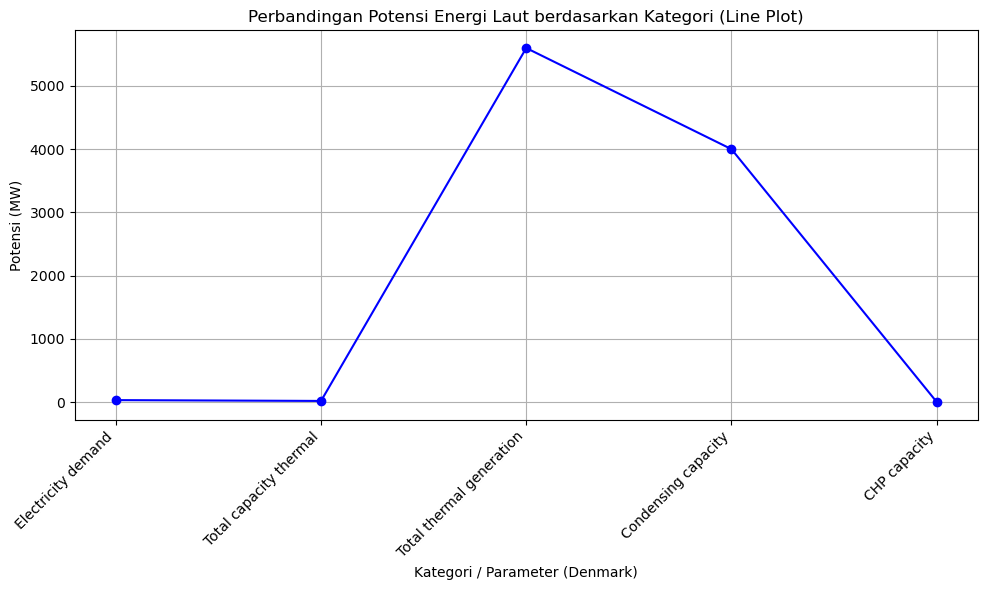

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load data
df = pd.read_csv("D:\Tugas Energi\persamaan data denmark indo.csv", sep=';')

# Salin data untuk grafik
df_plot = df[['Kategori / Parameter (Denmark)', 'Potensi (MW)']].copy()

# Fungsi untuk membersihkan string dan mengambil angka saja
def extract_mw(value):
    if pd.isna(value):
        return None
    # Ambil angka dari string dan hilangkan karakter seperti >, ±, ≈, MW
    match = re.findall(r"[\d.,]+", value)
    if match:
        num_str = match[0].replace('.', '').replace(',', '.')  # Ganti format Eropa ke float
        try:
            return float(num_str)
        except:
            return None
    return None

# Terapkan fungsi
df_plot['Potensi (MW)'] = df_plot['Potensi (MW)'].apply(extract_mw)

# Hapus baris dengan nilai kosong
df_plot.dropna(inplace=True)

# Plot grafik garis
plt.figure(figsize=(10,6))
plt.plot(df_plot['Kategori / Parameter (Denmark)'], df_plot['Potensi (MW)'], marker='o', linestyle='-', color='blue')
plt.xlabel("Kategori / Parameter (Denmark)")
plt.ylabel("Potensi (MW)")
plt.title("Perbandingan Potensi Energi Laut berdasarkan Kategori (Line Plot)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
pd.read_csv('D:\LKTI\Folder Baru\persamaan inggris indo.csv' , sep=';')

,Parameter (Inggris),Nilai (Inggris),Jenis Energi Laut,Potensi (MW),Status Pemanfaatan
0,Electricity demand,"310,6171841TWh",Offshore wind,>30 MW,Masih tahap studi & pilot
1,Total capacity thermal,"64167,8 MW",Gelombang laut,>17 MW,Belum dikembangkan
2,Total thermal generation,"125,5381425 TWh",Arus laut,±5600 MW,Uji coba skala kecil
3,CHP capacity,"5935,5 MW",Pasang surut,≈4000 MW,"Potensi besar, belum dikaji luas"


In [35]:
import pandas as pd

df = pd.read_csv("D:\LKTI\Folder Baru\persamaan inggris indo.csv", sep=';')
print(df.columns)
df.head()

Index(['Parameter (Inggris)', 'Nilai (Inggris)', 'Jenis Energi Laut',
       'Potensi (MW)', 'Status Pemanfaatan'],
      dtype='object')


,Parameter (Inggris),Nilai (Inggris),Jenis Energi Laut,Potensi (MW),Status Pemanfaatan
0,Electricity demand,"310,6171841TWh",Offshore wind,>30 MW,Masih tahap studi & pilot
1,Total capacity thermal,"64167,8 MW",Gelombang laut,>17 MW,Belum dikembangkan
2,Total thermal generation,"125,5381425 TWh",Arus laut,±5600 MW,Uji coba skala kecil
3,CHP capacity,"5935,5 MW",Pasang surut,≈4000 MW,"Potensi besar, belum dikaji luas"


In [36]:
print(df.columns)
df.head()

Index(['Parameter (Inggris)', 'Nilai (Inggris)', 'Jenis Energi Laut',
       'Potensi (MW)', 'Status Pemanfaatan'],
      dtype='object')


,Parameter (Inggris),Nilai (Inggris),Jenis Energi Laut,Potensi (MW),Status Pemanfaatan
0,Electricity demand,"310,6171841TWh",Offshore wind,>30 MW,Masih tahap studi & pilot
1,Total capacity thermal,"64167,8 MW",Gelombang laut,>17 MW,Belum dikembangkan
2,Total thermal generation,"125,5381425 TWh",Arus laut,±5600 MW,Uji coba skala kecil
3,CHP capacity,"5935,5 MW",Pasang surut,≈4000 MW,"Potensi besar, belum dikaji luas"


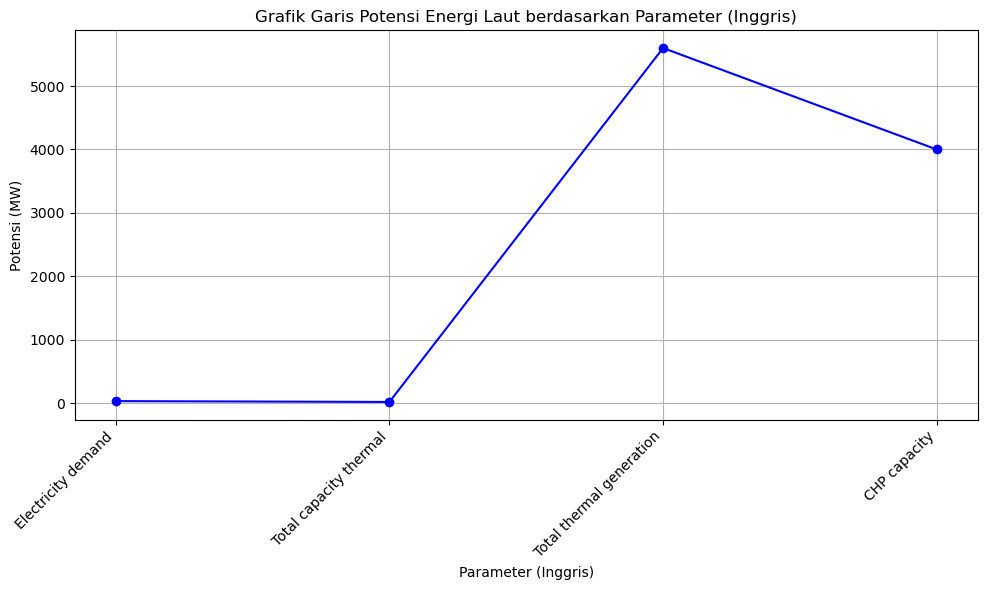

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load CSV (ganti path jika perlu)
df = pd.read_csv("D:\LKTI\Folder Baru\persamaan inggris indo.csv", sep=';')

# Ambil dua kolom relevan
df_plot = df[['Parameter (Inggris)', 'Potensi (MW)']].copy()

# Fungsi untuk mengekstrak nilai numerik dari string
def extract_mw(value):
    if pd.isna(value):
        return None
    # Cari angka dari string
    match = re.findall(r"[\d.,]+", value)
    if match:
        num_str = match[0].replace('.', '').replace(',', '.')  # Ganti titik dan koma
        try:
            return float(num_str)
        except:
            return None
    return None

# Bersihkan kolom Potensi (MW)
df_plot['Potensi (MW)'] = df_plot['Potensi (MW)'].apply(extract_mw)

# Hapus baris dengan nilai kosong
df_plot.dropna(inplace=True)

# Buat grafik garis
plt.figure(figsize=(10,6))
plt.plot(df_plot['Parameter (Inggris)'], df_plot['Potensi (MW)'], marker='o', linestyle='-', color='blue')
plt.xlabel("Parameter (Inggris)")
plt.ylabel("Potensi (MW)")
plt.title("Grafik Garis Potensi Energi Laut berdasarkan Parameter (Inggris)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
pd.read_csv('D:\LKTI\Folder Baru\persamaan norwegia dan indonesia.csv' , sep=';')

,Parameter Norwegia,Nilai Norwegia,Jenis Energi Laut,Potensi Energi Laut,Status Pemanfaatan
0,Kapasitas termal,"1.600,00 MW",Offshore wind,>30 MW,Masih tahap studi & pilot
1,Kapasitas condensing,0 MW,Gelombang laut,>17 MW,Belum dikembangkan
2,Kapasitas CHP,~1.600 MW,Arus laut,±5600 MW,Uji coba skala kecil
3,NaN,NaN,NaN,NaN,NaN


In [40]:
import pandas as pd

df = pd.read_csv("D:\LKTI\Folder Baru\persamaan norwegia dan indonesia.csv", sep=';')
print(df.columns)
df.head()

Index(['Parameter Norwegia', 'Nilai Norwegia', 'Jenis Energi Laut',
       'Potensi Energi Laut', 'Status Pemanfaatan'],
      dtype='object')


,Parameter Norwegia,Nilai Norwegia,Jenis Energi Laut,Potensi Energi Laut,Status Pemanfaatan
0,Kapasitas termal,"1.600,00 MW",Offshore wind,>30 MW,Masih tahap studi & pilot
1,Kapasitas condensing,0 MW,Gelombang laut,>17 MW,Belum dikembangkan
2,Kapasitas CHP,~1.600 MW,Arus laut,±5600 MW,Uji coba skala kecil
3,NaN,NaN,NaN,NaN,NaN


In [41]:
print(df.columns)
df.head()

Index(['Parameter Norwegia', 'Nilai Norwegia', 'Jenis Energi Laut',
       'Potensi Energi Laut', 'Status Pemanfaatan'],
      dtype='object')


,Parameter Norwegia,Nilai Norwegia,Jenis Energi Laut,Potensi Energi Laut,Status Pemanfaatan
0,Kapasitas termal,"1.600,00 MW",Offshore wind,>30 MW,Masih tahap studi & pilot
1,Kapasitas condensing,0 MW,Gelombang laut,>17 MW,Belum dikembangkan
2,Kapasitas CHP,~1.600 MW,Arus laut,±5600 MW,Uji coba skala kecil
3,NaN,NaN,NaN,NaN,NaN


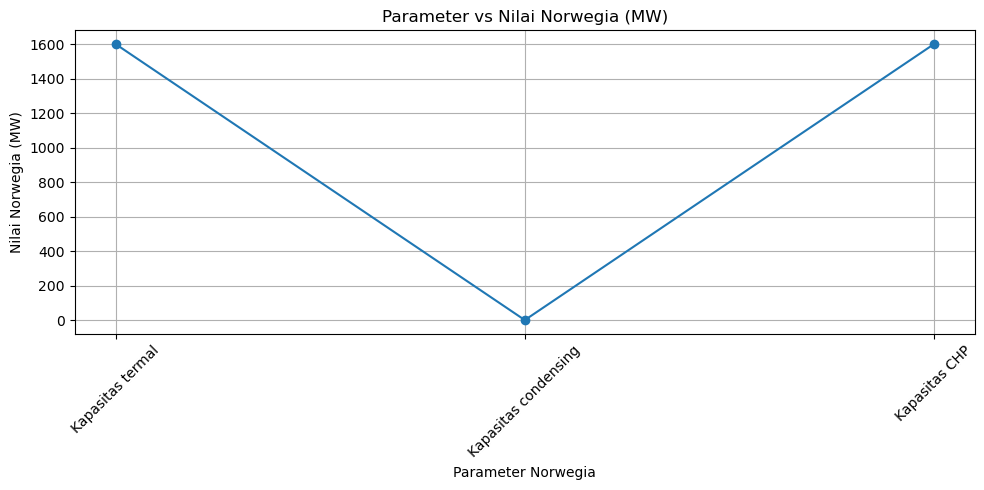

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Baca data
df = pd.read_csv("D:\LKTI\Folder Baru\persamaan norwegia dan indonesia.csv", sep=';')

# Bersihkan data 'Nilai Norwegia'
def extract_number(value):
    if pd.isna(value):
        return None
    # Ambil angka dari string dan ubah ke float
    value = re.sub(r'[^\d,.-]', '', value)
    value = value.replace('.', '').replace(',', '.')
    try:
        return float(value)
    except:
        return None

df['Nilai Norwegia (MW)'] = df['Nilai Norwegia'].apply(extract_number)

# Buang baris kosong
df_clean = df.dropna(subset=['Parameter Norwegia', 'Nilai Norwegia (MW)'])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_clean['Parameter Norwegia'], df_clean['Nilai Norwegia (MW)'], marker='o')
plt.title('Parameter vs Nilai Norwegia (MW)')
plt.xlabel('Parameter Norwegia')
plt.ylabel('Nilai Norwegia (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
pd.read_csv("D:\Tugas Energi\persamaan data thermal, potensi dan data permintaan produksi nasional.csv")

,Provinsi;Jenis Energi;Produksi (GWh);Permintaan (GWh);Potensi Laut (MW);Kapasitas Termal (MW)
0,Jawa Barat;Listrik PLTU;12000;10500;-;8000
1,Sulawesi Utara;Energi Laut;-;-;2500;-
2,Kalimantan;PLTU;6500;5800;-;4200


In [45]:
import pandas as pd

df = pd.read_csv("D:\Tugas Energi\persamaan data thermal, potensi dan data permintaan produksi nasional.csv")
print(df.columns)
df.head()

Index(['Provinsi;Jenis Energi;Produksi (GWh);Permintaan (GWh);Potensi Laut (MW);Kapasitas Termal (MW)'], dtype='object')


,Provinsi;Jenis Energi;Produksi (GWh);Permintaan (GWh);Potensi Laut (MW);Kapasitas Termal (MW)
0,Jawa Barat;Listrik PLTU;12000;10500;-;8000
1,Sulawesi Utara;Energi Laut;-;-;2500;-
2,Kalimantan;PLTU;6500;5800;-;4200


In [46]:
print('df.columns')
df.head()

df.columns


,Provinsi;Jenis Energi;Produksi (GWh);Permintaan (GWh);Potensi Laut (MW);Kapasitas Termal (MW)
0,Jawa Barat;Listrik PLTU;12000;10500;-;8000
1,Sulawesi Utara;Energi Laut;-;-;2500;-
2,Kalimantan;PLTU;6500;5800;-;4200


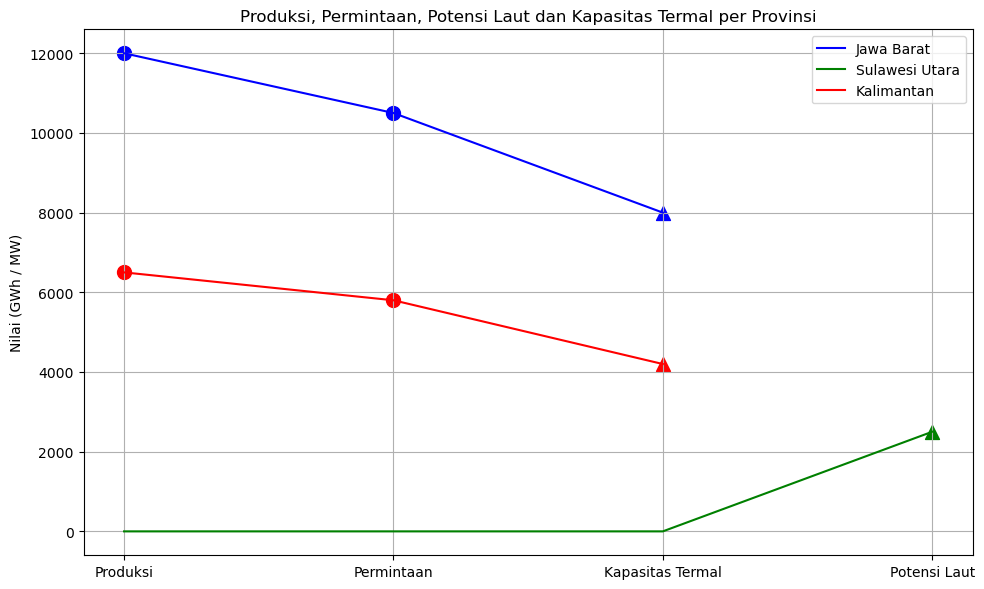

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data dari gambar
data = {
    'Provinsi': ['Jawa Barat', 'Sulawesi Utara', 'Kalimantan'],
    'Jenis Energi': ['Listrik PLTU', 'Energi Laut', 'PLTU'],
    'Produksi (GWh)': [12000, np.nan, 6500],
    'Permintaan (GWh)': [10500, np.nan, 5800],
    'Potensi Laut (MW)': [np.nan, 2500, np.nan],
    'Kapasitas Termal (MW)': [8000, np.nan, 4200]
}

df = pd.DataFrame(data)

categories = ['Produksi', 'Permintaan', 'Kapasitas Termal', 'Potensi Laut']

colors = ['blue', 'green', 'red']

# Marker per kategori
marker_map = {
    'Produksi': 'o',        # lingkaran
    'Permintaan': 'o',      # lingkaran
    'Kapasitas Termal': '^', # segitiga atas
    'Potensi Laut': '^'     # segitiga atas
}

plt.figure(figsize=(10, 6))

for idx, row in df.iterrows():
    provinsi = row['Provinsi']

    # Ambil nilai-nilai sesuai kategori
    values = [
        row['Produksi (GWh)'],
        row['Permintaan (GWh)'],
        row['Kapasitas Termal (MW)'],
        row['Potensi Laut (MW)']
    ]

    # Untuk Sulawesi Utara, kalau nilai NaN, diganti 0 agar garis nyambung
    if provinsi == 'Sulawesi Utara':
        values = [val if pd.notna(val) else 0 for val in values]

    # Plot garis nyambung
    plt.plot(categories, values, color=colors[idx], label=provinsi)

    # Plot marker sesuai kategori dan nilai asli (bukan 0 pengganti)
    for cat, val in zip(categories, values):
        if cat in ['Produksi', 'Permintaan']:
            asli = row[cat + ' (GWh)']
        else:
            asli = row[cat + ' (MW)']

        # Plot marker hanya jika nilai asli bukan NaN
        if pd.notna(asli):
            plt.scatter(cat, val, color=colors[idx], marker=marker_map[cat], s=100)

plt.title('Produksi, Permintaan, Potensi Laut dan Kapasitas Termal per Provinsi')
plt.ylabel('Nilai (GWh / MW)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
